# imports

In [1]:
import datetime
import importlib
import pandas as pd, numpy as np
import scipy
import matplotlib.pyplot as plt
from numpy_ext import rolling_apply as rolling_apply_ext
import talib
from talib import MA_Type
import numpy.linalg

In [2]:
import algo.data.read

In [3]:
df_binance_20230904_05 =  algo.data.read.df_binance_202309[(algo.data.read.df_binance_202309.index >= "2023-09-04 00:00:00") & (algo.data.read.df_binance_202309.index < "2023-09-06 00:00:00")]

In [4]:
#df = algo.data.read.df_binance_202309.copy()
df = df_binance_20230904_05
df_epoch = df.reset_index()
df_epoch['time'] = df_epoch['time'].astype(np.int64) // 10**9
df_epoch = df_epoch.rename(columns={'time': 'timestamp'}) 
df_epoch = df_epoch.set_index('timestamp')

In [990]:
df_epoch.to_csv('algo/data/binance/df_binance_20230904_05.csv')

In [983]:
df_epoch

symbol,1INCHBUSD,1INCHUSDT,AAVEBUSD,AAVEUSDT,ACABUSD,ACAUSDT,ACHBUSD,ACHUSDT,ACMUSDT,ADABUSD,...,YFIBUSD,YFIUSDT,YGGBUSD,YGGUSDT,ZECBUSD,ZECUSDT,ZENUSDT,ZILBUSD,ZILUSDT,ZRXUSDT
timestamp,,,,,,,,,,,,,,,,,,,,,
1693540800,0.2444,0.2441,55.70,55.71,0.0416,0.0418,0.01342,0.01342,1.944,0.2563,...,5520.0,5529.0,0.2448,0.2449,24.68,24.70,7.61,0.01622,0.01622,0.1656
1693540860,0.2444,0.2441,55.70,55.72,0.0416,0.0418,0.01342,0.01342,1.944,0.2564,...,5520.0,5529.0,0.2448,0.2448,24.68,24.70,7.61,0.01622,0.01622,0.1656
1693540920,0.2444,0.2439,55.70,55.69,0.0416,0.0417,0.01342,0.01342,1.944,0.2563,...,5520.0,5529.0,0.2448,0.2444,24.68,24.69,7.60,0.01622,0.01622,0.1656
1693540980,0.2444,0.2439,55.70,55.69,0.0416,0.0417,0.01341,0.01340,1.944,0.2563,...,5520.0,5532.0,0.2441,0.2438,24.68,24.69,7.60,0.01622,0.01622,0.1656
1693541040,0.2444,0.2438,55.70,55.71,0.0416,0.0417,0.01341,0.01341,1.944,0.2563,...,5520.0,5532.0,0.2440,0.2443,24.68,24.67,7.60,0.01622,0.01622,0.1656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696046040,0.2657,0.2663,66.25,66.22,NaN,0.0491,0.01503,0.01505,1.795,0.2508,...,5212.0,5218.0,0.2110,0.2117,26.64,26.64,7.71,0.01767,0.01770,0.1897
1696046100,0.2657,0.2660,66.25,66.20,NaN,0.0491,0.01503,0.01505,1.795,0.2508,...,5212.0,5218.0,0.2110,0.2115,26.64,26.64,7.71,0.01767,0.01771,0.1896
1696046160,0.2657,0.2660,66.25,66.13,NaN,0.0491,0.01503,0.01503,1.795,0.2509,...,5212.0,5215.0,0.2110,0.2115,26.64,26.64,7.71,0.01767,0.01771,0.1897


In [917]:
df_epoch.columns

Index(['1INCHBUSD', '1INCHUSDT', 'AAVEBUSD', 'AAVEUSDT', 'ACABUSD', 'ACAUSDT',
       'ACHBUSD', 'ACHUSDT', 'ACMUSDT', 'ADABUSD',
       ...
       'YFIBUSD', 'YFIUSDT', 'YGGBUSD', 'YGGUSDT', 'ZECBUSD', 'ZECUSDT',
       'ZENUSDT', 'ZILBUSD', 'ZILUSDT', 'ZRXUSDT'],
      dtype='object', name='symbol', length=614)

In [5]:
algo.data.read.df_binance_202309.resample('10min').last().dropna().corr()

symbol,1INCHBUSD,1INCHUSDT,AAVEBUSD,AAVEUSDT,ACABUSD,ACAUSDT,ACHBUSD,ACHUSDT,ACMUSDT,ADABUSD,...,YFIBUSD,YFIUSDT,YGGBUSD,YGGUSDT,ZECBUSD,ZECUSDT,ZENUSDT,ZILBUSD,ZILUSDT,ZRXUSDT
symbol,,,,,,,,,,,,,,,,,,,,,
1INCHBUSD,1.000000,0.997505,0.739102,0.747099,0.361370,0.362615,0.819186,0.827050,-0.450674,0.519208,...,-0.088715,-0.096456,-0.055080,-0.054243,0.678007,0.689126,0.266915,0.884211,0.889908,0.785350
1INCHUSDT,0.997505,1.000000,0.740434,0.749659,0.363035,0.364294,0.822250,0.831141,-0.451785,0.520860,...,-0.089869,-0.094641,-0.054449,-0.053326,0.678961,0.691481,0.269298,0.884598,0.892141,0.785671
AAVEBUSD,0.739102,0.740434,1.000000,0.993948,0.574879,0.573982,0.729800,0.735490,-0.151144,0.641171,...,0.171156,0.181693,-0.140492,-0.140305,0.696405,0.701236,0.199581,0.842928,0.841132,0.600947
AAVEUSDT,0.747099,0.749659,0.993948,1.000000,0.580467,0.580048,0.738024,0.745187,-0.159265,0.640384,...,0.167680,0.180555,-0.141307,-0.140690,0.699813,0.707277,0.197252,0.845575,0.846309,0.605890
ACABUSD,0.361370,0.363035,0.574879,0.580467,1.000000,0.998065,0.498043,0.499117,-0.185104,0.110230,...,-0.017399,-0.014858,-0.353152,-0.353168,0.571873,0.575629,-0.148498,0.522010,0.522710,0.234087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZECUSDT,0.689126,0.691481,0.701236,0.707277,0.575629,0.575707,0.664518,0.668774,-0.385685,0.438630,...,0.005271,-0.003715,-0.318480,-0.319188,0.992180,1.000000,0.056565,0.793247,0.797359,0.555926
ZENUSDT,0.266915,0.269298,0.199581,0.197252,-0.148498,-0.148290,0.450291,0.449458,0.424221,0.334600,...,0.510965,0.511955,0.800874,0.799108,0.061159,0.056565,1.000000,0.168078,0.172559,-0.100606
ZILBUSD,0.884211,0.884598,0.842928,0.845575,0.522010,0.519353,0.772939,0.778373,-0.451652,0.628006,...,-0.096035,-0.094228,-0.247679,-0.248092,0.787573,0.793247,0.168078,1.000000,0.993997,0.800273


In [6]:
symbols_pool = [s for _, s in sorted([(m, s) for s, m in algo.data.read.df_binance_202309.mean().items() if m > 10 and m < 500], reverse=True)]
# remove duplicates within USDT / BUSD swap
symbols_pool = [s for s in symbols_pool if s not in [s.replace('USDT', 'BUSD') for s in symbols_pool if 'USDT' in s]]
symbols_pool

['BIFIUSDT',
 'BNBUSDT',
 'BCHUSDT',
 'XMRUSDT',
 'GNOUSDT',
 'QNTUSDT',
 'LTCUSDT',
 'AAVEUSDT',
 'KP3RUSDT',
 'ILVUSDT',
 'COMPUSDT',
 'GMXUSDT',
 'TRBUSDT',
 'WNXMUSDT',
 'DASHUSDT',
 'ZECUSDT',
 'EGLDUSDT',
 'RPLUSDT',
 'FARMUSDT',
 'BNBUPUSDT',
 'SOLUSDT',
 'KSMUSDT',
 'SSVUSDT',
 'ETCUSDT',
 'MLNUSDT',
 'NMRUSDT',
 'DCRUSDT',
 'CREAMBUSD',
 'ALCXUSDT']

In [7]:
set_size, set_num = 2, 6
symbols_sets = algo.data.read.get_high_corr_symbols_set_of(algo.data.read.df_binance_202308, 10, set_size, set_num, symbols_pool, high_corr=True)
symbols_sets

start_symbol: FARMUSDT
(0.9853091961277229, 'FARMUSDT', 'COMPUSDT')
start_symbol: ZECUSDT
(0.9821116700462315, 'ZECUSDT', 'LTCUSDT')
start_symbol: BNBUPUSDT
(0.981275983108528, 'BNBUPUSDT', 'BNBUSDT')
start_symbol: SSVUSDT
(0.9804022282607159, 'SSVUSDT', 'KP3RUSDT')
start_symbol: SOLUSDT
(0.9798867228498191, 'SOLUSDT', 'ILVUSDT')
start_symbol: DASHUSDT
(0.9720447363256844, 'DASHUSDT', 'BIFIUSDT')


[['FARMUSDT', 'COMPUSDT'],
 ['ZECUSDT', 'LTCUSDT'],
 ['BNBUPUSDT', 'BNBUSDT'],
 ['SSVUSDT', 'KP3RUSDT'],
 ['SOLUSDT', 'ILVUSDT'],
 ['DASHUSDT', 'BIFIUSDT']]

In [8]:
set_size, set_num = 2, 6
symbols_sets_low_corr = algo.data.read.get_high_corr_symbols_set_of(algo.data.read.df_binance_202308, 10, set_size, set_num, symbols_pool, high_corr=False)
symbols_sets_low_corr

start_symbol: EGLDUSDT
(0.005776412349793026, 'EGLDUSDT', 'QNTUSDT')
start_symbol: RPLUSDT
(0.038605806813175034, 'RPLUSDT', 'TRBUSDT')
start_symbol: CREAMBUSD
(0.7847216100092885, 'CREAMBUSD', 'WNXMUSDT')
start_symbol: DCRUSDT
(0.7866866013569517, 'DCRUSDT', 'KSMUSDT')
start_symbol: ETCUSDT
(0.8245124827124991, 'ETCUSDT', 'XMRUSDT')
start_symbol: BCHUSDT
(0.8533584437153164, 'BCHUSDT', 'BIFIUSDT')


[['EGLDUSDT', 'QNTUSDT'],
 ['RPLUSDT', 'TRBUSDT'],
 ['CREAMBUSD', 'WNXMUSDT'],
 ['DCRUSDT', 'KSMUSDT'],
 ['ETCUSDT', 'XMRUSDT'],
 ['BCHUSDT', 'BIFIUSDT']]

In [863]:
#symbols = ['YFIIUSDT', 'ETHUSDT', 'PAXGUSDT', 'BIFIUSDT', 'BNBUSDT']
#symbols = ['YFIIUSDT', 'ETHUSDT', 'BIFIUSDT']
symbols = ['BNBUPUSDT', 'BNBUSDT', 'SOLUSDT']

In [867]:
df = algo.data.read.get_close_between_date(algo.data.read.df_binance_202308, 5, symbols, date_str_20230806, date_str_20230809).dropna()
(df / df.iloc[0])

symbol,BNBUPUSDT,BNBUSDT,SOLUSDT
time,,,
2023-08-06 02:55:00,1.000000,1.000000,1.000000
2023-08-06 03:10:00,0.999298,1.000410,0.997810
2023-08-06 03:15:00,1.000702,1.000820,0.999124
2023-08-06 03:20:00,1.005269,1.002049,0.999562
2023-08-06 03:25:00,1.009132,1.003279,1.000000
...,...,...,...
2023-08-06 09:15:00,1.008079,1.003689,1.016207
2023-08-06 09:20:00,1.008079,1.003279,1.013579
2023-08-06 09:25:00,1.008079,1.002869,1.013579


In [864]:
algo.data.read.get_close_between_date(algo.data.read.df_binance_202308, 1, symbols, date_str_20230806, date_str_20230809).corr().style.background_gradient(cmap='coolwarm')

symbol,BNBUPUSDT,BNBUSDT,SOLUSDT
symbol,,,
BNBUPUSDT,1.000000,0.896701,0.655109
BNBUSDT,0.896701,1.000000,0.721838
SOLUSDT,0.655109,0.721838,1.000000


In [865]:
algo.data.read.get_close_between_date(algo.data.read.df_binance_202308, 1, symbols_sets_low_corr[0], date_str_20230806, date_str_20230831).corr().style.background_gradient(cmap='coolwarm')

symbol,EGLDUSDT,QNTUSDT
symbol,,
EGLDUSDT,1.000000,0.007205
QNTUSDT,0.007205,1.000000


In [866]:
algo.data.read.get_close_between_date(algo.data.read.df_binance_202308, 1, symbols_sets_low_corr[1], date_str_20230806, date_str_20230831).corr().style.background_gradient(cmap='coolwarm')

symbol,TRBUSDT,RPLUSDT
symbol,,
TRBUSDT,1.000000,-0.024562
RPLUSDT,-0.024562,1.000000


# Solve the minimal predictability condition

In [9]:
import algo.minimal_predictability.calculate
importlib.reload(algo.minimal_predictability.calculate)

<module 'algo.minimal_predictability.calculate' from '/home/junlim/projects/mean_reversal/algo/minimal_predictability/calculate.py'>

# Trading calculations

In [22]:
import algo.statarbitrage.bband
importlib.reload(algo.statarbitrage.bband)

<module 'algo.statarbitrage.bband' from '/home/junlim/projects/mean_reversal/algo/statarbitrage/bband.py'>

# Rolling-based Portfolio Construction

In [40]:
import algo.research.simulation
importlib.reload(algo.research.simulation)

<module 'algo.research.simulation' from '/home/junlim/projects/mean_reversal/algo/research/simulation.py'>

symbols: ['FARMUSDT', 'COMPUSDT']


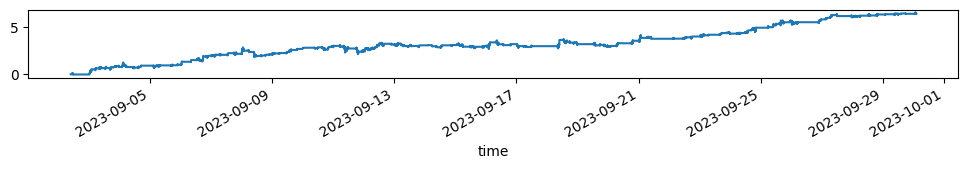

symbols: ['ZECUSDT', 'LTCUSDT']


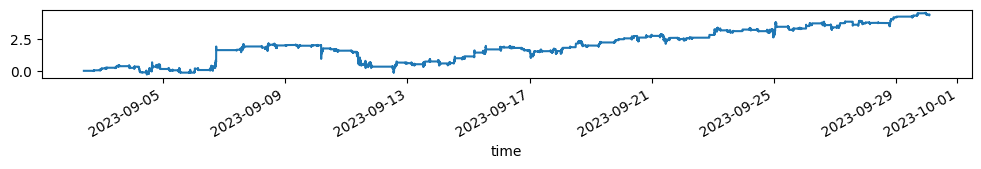

symbols: ['BNBUPUSDT', 'BNBUSDT']


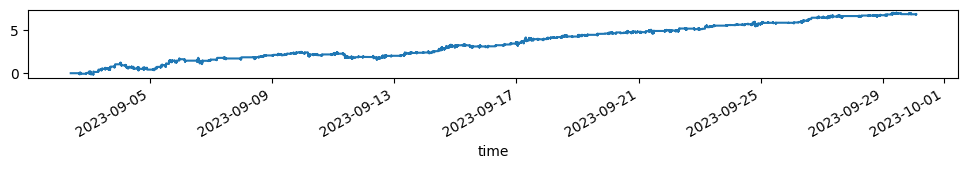

symbols: ['SSVUSDT', 'KP3RUSDT']


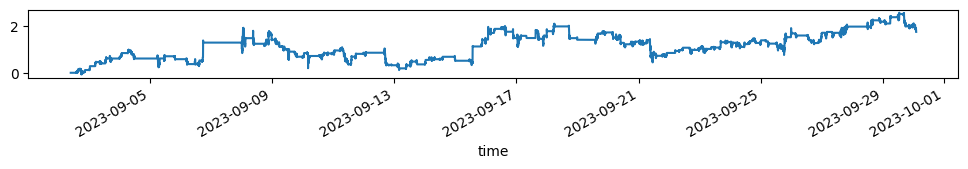

symbols: ['SOLUSDT', 'ILVUSDT']


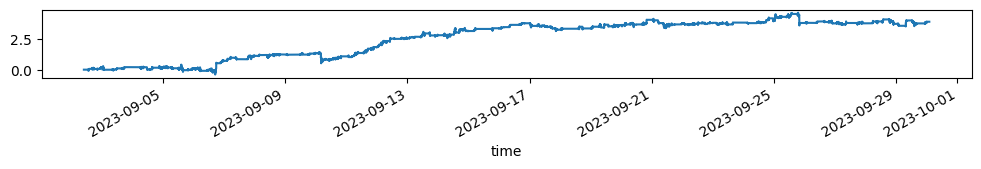

symbols: ['DASHUSDT', 'BIFIUSDT']


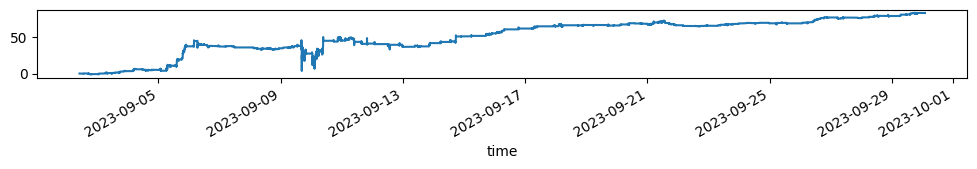

In [41]:
bband_trading_param = algo.statarbitrage.bband.BBandTradingParam(60, 2.0)
stat_arbitrage_trading_param = algo.research.simulation.StatArbitrageTradingParam(
    train_data_sample_period_minutes=10, fitting_window=180, rebalance_period_minutes=120, if_evecs=True, bband_trading_param=bband_trading_param)
for symbols in symbols_sets[:]:
    print(f'symbols: {symbols}')
    values_list = algo.research.simulation.get_trading_result(algo.data.read.df_binance_202309, symbols, stat_arbitrage_trading_param, if_evecs=True)
    values_concat = pd.concat(values_list)
    ax = values_concat.profit_raw.cumsum().plot(figsize=(12, 1))
    ymin, ymax = 0, values_concat.profit_raw.cumsum().max()
    
    #ax.vlines(x=list(df_rolling_wgt_resampled.index), ymin=ymin, ymax=ymax, color='g', linestyles='dashed', label='rebalance')
    #ax.vlines(x=list(values_concat[values_concat.position_changed == +1].index), ymin=ymin, ymax=ymax, color='b', linestyles='dashed', label='enter')
    #ax.vlines(x=list(values_concat[values_concat.position_changed == -1].index), ymin=ymin, ymax=ymax, color='r', linestyles='solid', label='leave')
    
    plt.show()

symbols: ['FARMUSDT', 'COMPUSDT']


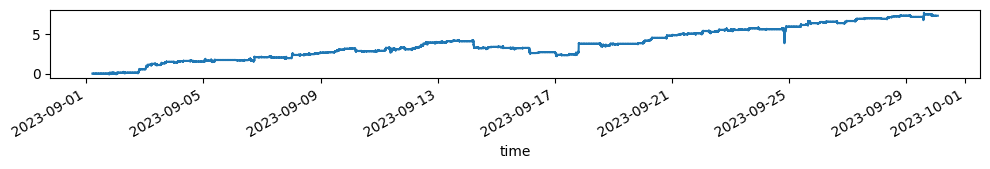

symbols: ['ZECUSDT', 'LTCUSDT']


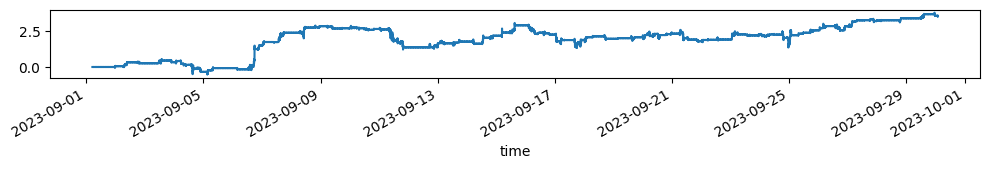

symbols: ['BNBUPUSDT', 'BNBUSDT']


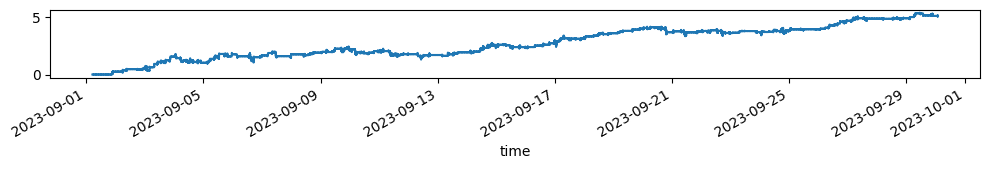

symbols: ['SSVUSDT', 'KP3RUSDT']


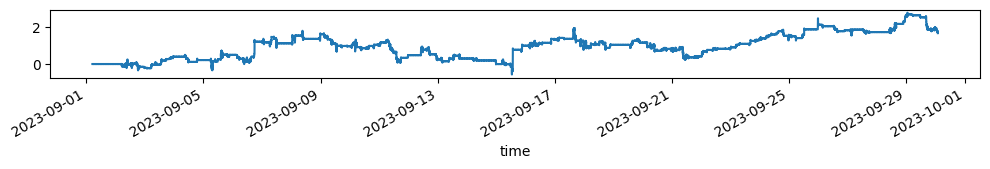

symbols: ['SOLUSDT', 'ILVUSDT']


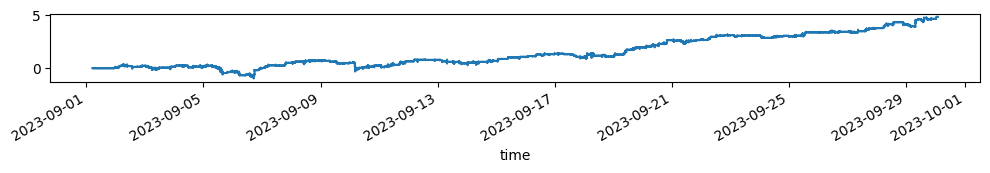

symbols: ['DASHUSDT', 'BIFIUSDT']


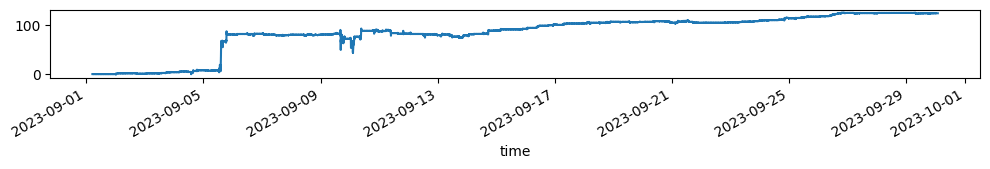

In [880]:
bband_trading_param = algo.statarbitrage.bband.BBandTradingParam(60, 2.0)
stat_arbitrage_trading_param = algo.research.simulation.StatArbitrageTradingParam(
    train_data_sample_period_minutes=5, fitting_window=180, rebalance_period_minutes=120, if_evecs=True, bband_trading_param=bband_trading_param)
for symbols in symbols_sets[:]:
    print(f'symbols: {symbols}')
    values_list = algo.research.simulation.get_trading_result(algo.data.read.df_binance_202309, symbols, stat_arbitrage_trading_param, if_evecs=True)
    values_concat = pd.concat(values_list)
    ax = values_concat.profit_raw.cumsum().plot(figsize=(12, 1))
    ymin, ymax = 0, values_concat.profit_raw.cumsum().max()
    
    #ax.vlines(x=list(df_rolling_wgt_resampled.index), ymin=ymin, ymax=ymax, color='g', linestyles='dashed', label='rebalance')
    #ax.vlines(x=list(values_concat[values_concat.position_changed == +1].index), ymin=ymin, ymax=ymax, color='b', linestyles='dashed', label='enter')
    #ax.vlines(x=list(values_concat[values_concat.position_changed == -1].index), ymin=ymin, ymax=ymax, color='r', linestyles='solid', label='leave')
    
    plt.show()

In [29]:
import algo.statarbitrage.bband
importlib.reload(algo.statarbitrage.bband)

<module 'algo.statarbitrage.bband' from '/home/junlim/projects/mean_reversal/algo/statarbitrage/bband.py'>

In [98]:
df_prices = algo.data.read.df_binance_202309
symbols = symbols_sets[0]
bband_trading_param = algo.statarbitrage.bband.BBandTradingParam(60, 2.5)
stat_arbitrage_trading_param = algo.research.simulation.StatArbitrageTradingParam(
    train_data_sample_period_minutes=10, fitting_window=180, rebalance_period_minutes=120, if_evecs=True, bband_trading_param=bband_trading_param)
if_evecs = True
# def get_trading_result(df_prices, symbols, stat_arbitrage_trading_param, if_evecs):-

df_prices_train_sampled = df_prices[symbols].resample(f'{stat_arbitrage_trading_param.train_data_sample_period_minutes}min').last().dropna()
df_rolling_wgt, df_rolling_wgt_resampled = algo.research.simulation.get_var1_wgts_values_transpose_rolling(
    df_prices_train_sampled, 
    window=stat_arbitrage_trading_param.fitting_window, 
    rebalance_period_minutes=stat_arbitrage_trading_param.rebalance_period_minutes, 
    order=0, if_evecs=if_evecs)

df_prices_list = []
head_buffer_length = stat_arbitrage_trading_param.bband_trading_param.bb_windows
wgt_resammpled = df_rolling_wgt_resampled
for i, index_head in enumerate(wgt_resammpled.index):
    if i == len(wgt_resammpled.index)-1: continue

    index_head_buffered = index_head - pd.Timedelta(minutes=head_buffer_length)
    index_tail = wgt_resammpled.index[i+1]
    df_prices_i = df_prices[(df_prices.index < index_tail) & (df_prices.index >= index_head_buffered)]
    df_prices_list.append((index_head_buffered, index_head, index_tail, df_prices_i, wgt_resammpled.loc[index_head]))

values_list = []
for index_head_buffered, index_head, index_tail, df_prices_i, wgt in df_prices_list:
    values_i = algo.statarbitrage.bband.add_features(df_prices_i, wgt, stat_arbitrage_trading_param.bband_trading_param, rebalance_buffer=head_buffer_length)
    if len(values_i) > 0:
        values_i['value_0'] = values_i.value - values_i.value.iloc[0]
        if values_i.at[values_i.index[-1], 'in_position'] == 1:
            values_i.at[values_i.index[-1], 'position_changed'] = -1
    values_list.append(values_i)


In [99]:
values_concat = pd.concat(values_list)

In [100]:
len(values_concat[values_concat.position_changed == 1].dropna())

81

In [101]:
values_concat[values_concat.index >= "2023-09-03 01:58:00"].head(8)

,value,rebalanced,rebalance_age,upper,lower,value_prev,lower_crossed_upward,lower_crossed_downward,upper_crossed_upward,upper_crossed_downward,in_position,position_changed,mean_size,position_size,profit_raw,profit,value_0
time,,,,,,,,,,,,,,,,,
2023-09-03 01:58:00,36.055524,0,119,36.187632,35.938542,36.059645,0,0,0,0,1,0.0,18.027762,17.861924,-0.004121,-0.000114,0.201322
2023-09-03 01:59:00,36.047283,0,120,36.178161,35.944852,36.055524,0,0,0,0,1,-1.0,18.023641,17.861924,-0.008242,-0.000229,0.193081
2023-09-03 02:00:00,39.327310,0,1,39.580456,39.345466,39.456648,0,1,0,0,0,0.0,19.663655,0.000000,-0.000000,-0.000000,0.000000
2023-09-03 02:01:00,39.322013,0,2,39.571285,39.326406,39.327310,0,0,0,0,0,0.0,19.661006,0.000000,-0.000000,-0.000000,-0.005297
2023-09-03 02:02:00,39.327310,0,3,39.566540,39.306812,39.322013,1,0,0,0,1,1.0,19.663655,0.000000,0.000000,0.000000,0.000000
2023-09-03 02:03:00,39.332608,0,4,39.562141,39.290373,39.327310,0,0,0,0,1,0.0,19.666304,19.666304,0.005297,0.000135,0.005297
2023-09-03 02:04:00,39.322013,0,5,39.559167,39.272476,39.332608,0,0,0,0,1,0.0,19.661006,19.666304,-0.010595,-0.000269,-0.005297
2023-09-03 02:05:00,39.311418,0,6,39.556374,39.254369,39.322013,0,0,0,0,1,0.0,19.655709,19.666304,-0.010595,-0.000269,-0.015892


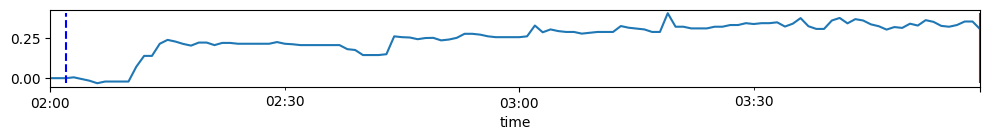

In [102]:
i = 25
ax = values_list[i-2].dropna().profit_raw.cumsum().plot(figsize=(12, 1))
ymin, ymax = values_list[i-2].dropna().profit_raw.cumsum().min(), values_list[i-2].dropna().profit_raw.cumsum().max()
ax.vlines(x=list(values_list[i-2][values_list[i-2].position_changed == +1].index), ymin=ymin, ymax=ymax, color='b', linestyles='dashed', label='enter')
ax.vlines(x=list(values_list[i-2][values_list[i-2].position_changed == -1].index), ymin=ymin, ymax=ymax, color='r', linestyles='solid', label='leave')
plt.show()

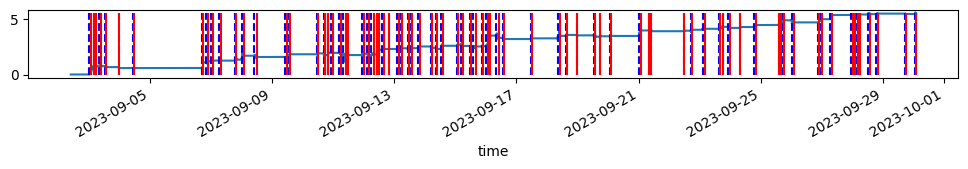

In [103]:
ax = values_concat.profit_raw.cumsum().plot(figsize=(12, 1))
ymin, ymax = 0, values_concat.profit_raw.cumsum().max()

#ax.vlines(x=list(df_rolling_wgt_resampled.index), ymin=ymin, ymax=ymax, color='g', linestyles='dashed', label='rebalance')
ax.vlines(x=list(values_concat[values_concat.position_changed == +1].index), ymin=ymin, ymax=ymax, color='b', linestyles='dashed', label='enter')
ax.vlines(x=list(values_concat[values_concat.position_changed == -1].index), ymin=ymin, ymax=ymax, color='r', linestyles='solid', label='leave')

plt.show()

<Axes: xlabel='time'>

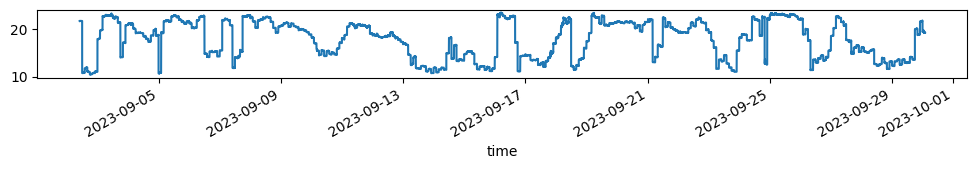

In [104]:
values_concat.mean_size.plot(figsize=(12, 1))

In [105]:
values_concat.position_changed.abs().sum()

162.0

In [106]:
len(values_concat.dropna())

39836

# etc

<Axes: xlabel='time'>

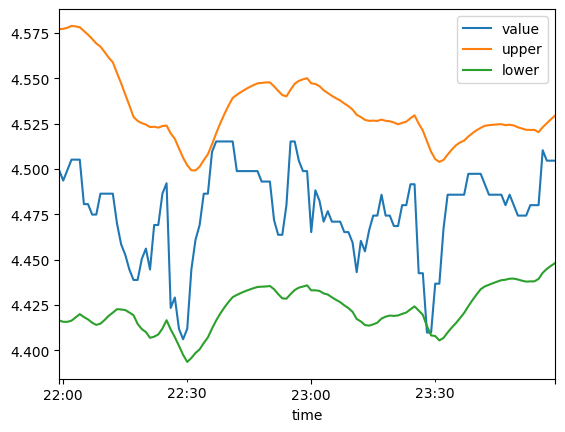

In [938]:
values_list[93][['value', 'upper', 'lower']].plot()

<Axes: xlabel='time'>

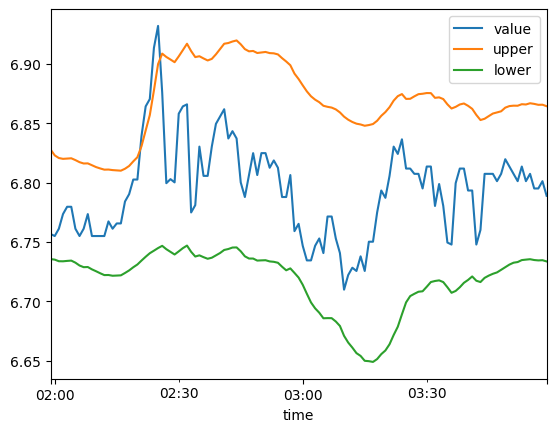

In [940]:
values_list[95][['value', 'upper', 'lower']].plot()

<Axes: xlabel='time'>

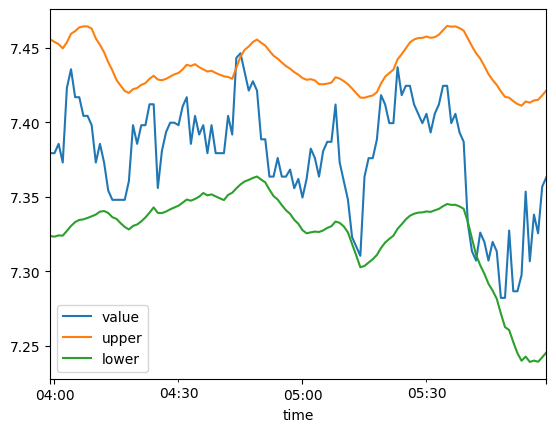

In [941]:
values_list[96][['value', 'upper', 'lower']].plot()

<Axes: xlabel='time'>

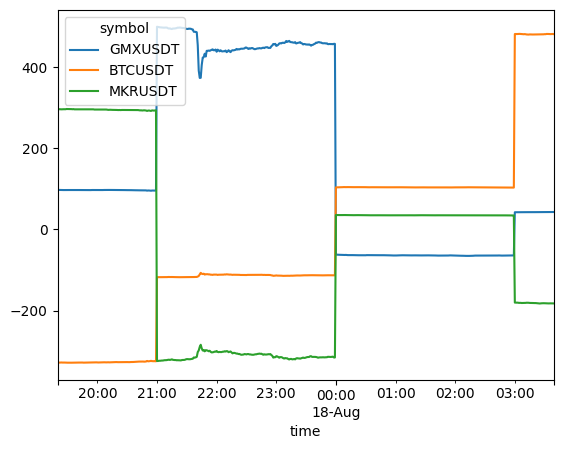

In [683]:
(df_prices * df_rolling_wgt_resampled.resample('1min').first().ffill()).iloc[17000:17500].plot()

<Axes: xlabel='time'>

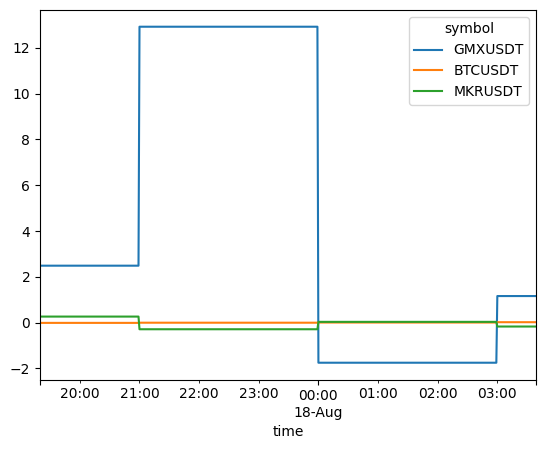

In [684]:
df_rolling_wgt_resampled.resample('1min').first().ffill().iloc[17000:17500].plot()

<Axes: xlabel='time'>

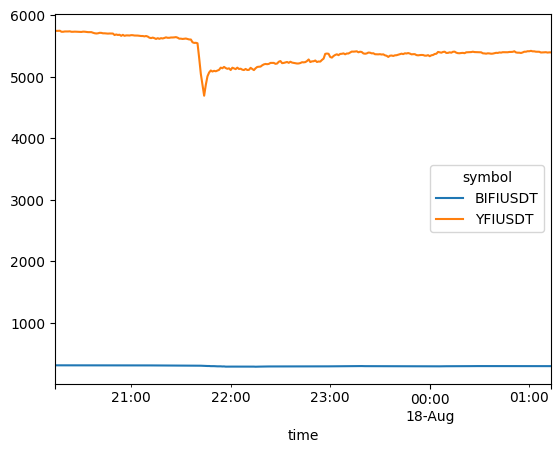

In [660]:
df_prices.iloc[10000:10300].plot()

<Axes: xlabel='time'>

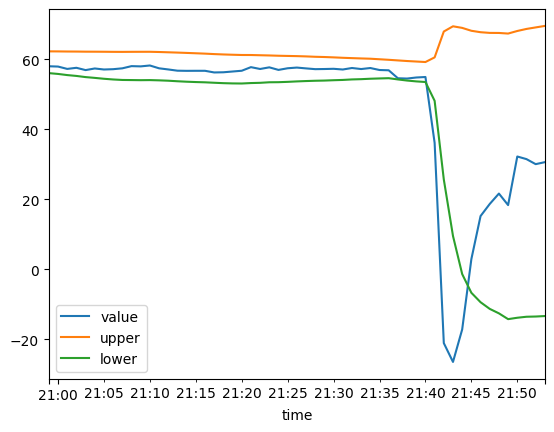

In [607]:
values_list[95].iloc[0:55][['value', 'upper', 'lower']].plot()

In [350]:
values_list[95].iloc[0:10]

,value,rebalanced,rebalance_age,upper,lower,value_prev,lower_crossed_upward,lower_crossed_downward,upper_crossed_upward,upper_crossed_downward,in_position,position_changed,mean_size,position_size,profit_raw,profit,value_0
time,,,,,,,,,,,,,,,,,
2023-08-17 20:59:00,197.678883,0,60,199.556750,196.115248,198.096973,0,0,0,0,0,NaN,11484.300135,0.000000,NaN,NaN,0.000000
2023-08-17 21:00:00,196.827749,0,61,199.455753,196.014269,197.678883,0,0,0,0,0,0.0,11495.700049,0.000000,-0.000000,-0.000000,-0.851134
2023-08-17 21:01:00,195.689635,0,62,199.316355,195.743995,196.827749,0,1,0,0,0,0.0,11498.022285,0.000000,-0.000000,-0.000000,-1.989248
2023-08-17 21:02:00,196.686304,0,63,199.240919,195.650436,195.689635,1,0,0,0,1,1.0,11498.424305,0.000000,0.000000,0.000000,-0.992578
2023-08-17 21:03:00,194.137323,0,64,199.068686,195.160217,196.686304,0,1,0,0,1,0.0,11486.195017,11486.195017,-2.548981,-0.012960,-3.541560
2023-08-17 21:04:00,195.008098,0,65,198.947165,194.860020,194.137323,1,0,0,0,1,0.0,11482.347647,11486.195017,0.870775,0.004485,-2.670785
2023-08-17 21:05:00,195.085826,0,66,198.806383,194.636901,195.008098,0,0,0,0,1,0.0,11488.625791,11486.195017,0.077729,0.000399,-2.593057
2023-08-17 21:06:00,195.145393,0,67,198.694808,194.432955,195.085826,0,0,0,0,1,0.0,11480.122225,11486.195017,0.059566,0.000305,-2.533490
2023-08-17 21:07:00,194.896758,0,68,198.566908,194.227172,195.145393,0,0,0,0,1,0.0,11474.693686,11486.195017,-0.248634,-0.001274,-2.782124


In [344]:
values_list[95].iloc[39:48]

,value,rebalanced,rebalance_age,upper,lower,value_prev,lower_crossed_upward,lower_crossed_downward,upper_crossed_upward,upper_crossed_downward,in_position,position_changed,mean_size,position_size,profit_raw,profit,value_0
time,,,,,,,,,,,,,,,,,
2023-08-17 21:38:00,185.318683,0,99,196.761479,181.625366,185.412153,0,0,0,0,1,0.0,11437.465204,11486.195017,-0.093470,-0.000504,-12.360199
2023-08-17 21:39:00,187.181548,0,100,196.664258,181.320201,185.318683,0,0,0,0,1,0.0,11440.021289,11486.195017,1.862865,0.010052,-10.497335
2023-08-17 21:40:00,187.683243,0,101,196.641494,181.081162,187.181548,0,0,0,0,1,0.0,11438.519034,11486.195017,0.501695,0.002680,-9.995640
2023-08-17 21:41:00,185.229852,0,102,196.515411,180.480934,187.683243,0,0,0,0,1,0.0,11345.714662,11486.195017,-2.453391,-0.013072,-12.449031
2023-08-17 21:42:00,144.899558,0,103,198.955994,169.320459,185.229852,0,1,0,0,1,0.0,11190.363888,11486.195017,-40.330293,-0.217731,-52.779324
2023-08-17 21:43:00,225.484735,0,104,205.280144,171.265755,144.899558,1,0,1,0,1,0.0,10819.834398,11486.195017,80.585177,0.556145,27.805852
2023-08-17 21:44:00,301.159549,0,105,232.227344,166.896229,225.484735,0,0,0,0,1,0.0,10480.866355,11486.195017,75.674814,0.335609,103.480666
2023-08-17 21:45:00,268.614421,0,106,244.281056,168.653239,301.159549,0,0,0,0,1,0.0,10683.840744,11486.195017,-32.545128,-0.108066,70.935539
2023-08-17 21:46:00,242.516953,0,107,249.743334,170.401014,268.614421,0,0,0,1,0,-1.0,10758.113655,11486.195017,-26.097468,-0.097156,44.838070


In [340]:
df_prices.iloc[10085:10100]

symbol,BTCUSDT,BTCBUSD,BNBBUSD
time,,,
2023-08-17 21:38:00,27573.68,27533.57,221.8
2023-08-17 21:39:00,27578.74,27541.68,221.9
2023-08-17 21:40:00,27574.80,27540.52,221.6
2023-08-17 21:41:00,27351.64,27311.28,220.5
2023-08-17 21:42:00,27000.00,26874.42,219.8
2023-08-17 21:43:00,26054.32,26063.61,216.8
2023-08-17 21:44:00,25188.01,25296.86,218.2
2023-08-17 21:45:00,25699.03,25777.76,216.5
2023-08-17 21:46:00,25894.61,25930.44,216.7


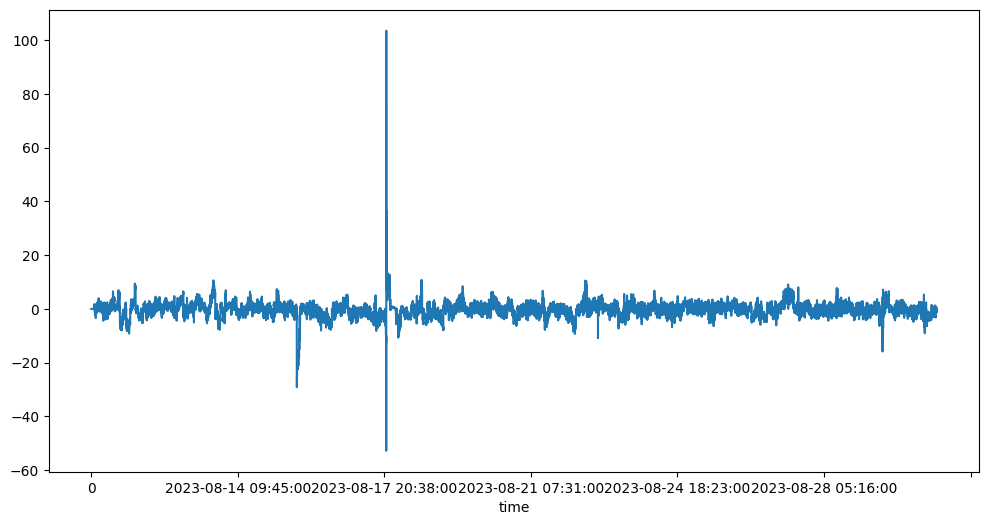

In [413]:
values_concat = pd.concat(values_list)
ax = values_concat.value_0.plot(figsize=(12, 6))
ymin, ymax = values_concat.value_0.min(), values_concat.value_0.max()

#ax.vlines(x=list(df_rolling_wgt_resampled.index), ymin=ymin, ymax=ymax, color='g', linestyles='dashed', label='rebalance')

plt.show()

<Axes: xlabel='time'>

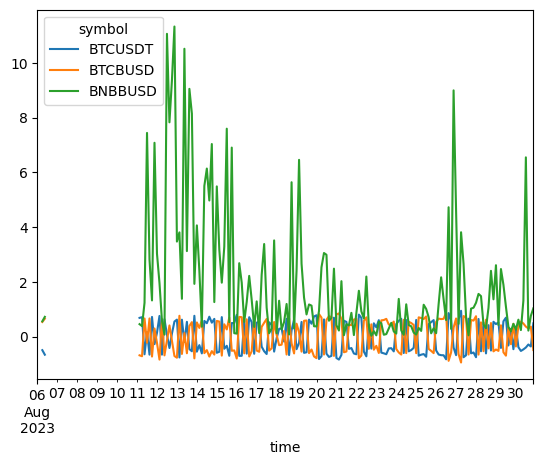

In [266]:
df_rolling_wgt_resampled.plot()

In [259]:
df_rolling_wgt_resampled.index

DatetimeIndex(['2023-08-06 00:00:00', '2023-08-06 03:00:00',
               '2023-08-06 06:00:00', '2023-08-06 09:00:00',
               '2023-08-06 12:00:00', '2023-08-06 15:00:00',
               '2023-08-06 18:00:00', '2023-08-06 21:00:00',
               '2023-08-07 00:00:00', '2023-08-07 03:00:00',
               ...
               '2023-08-29 18:00:00', '2023-08-29 21:00:00',
               '2023-08-30 00:00:00', '2023-08-30 03:00:00',
               '2023-08-30 06:00:00', '2023-08-30 09:00:00',
               '2023-08-30 12:00:00', '2023-08-30 15:00:00',
               '2023-08-30 18:00:00', '2023-08-30 21:00:00'],
              dtype='datetime64[ns]', name='time', length=200, freq='180T')

In [257]:
df_rolling_wgt_resampled

symbol,BTCUSDT,BTCBUSD,BNBBUSD
time,,,
2023-08-06 00:00:00,NaN,NaN,NaN
2023-08-06 03:00:00,NaN,NaN,NaN
2023-08-06 06:00:00,-0.498671,0.531318,0.555894
2023-08-06 09:00:00,-0.664215,0.653163,0.718548
2023-08-06 12:00:00,NaN,NaN,NaN
...,...,...,...
2023-08-30 09:00:00,-0.470847,0.475181,1.309584
2023-08-30 12:00:00,-0.401504,0.361844,6.547826
2023-08-30 15:00:00,-0.291655,0.295036,0.216342


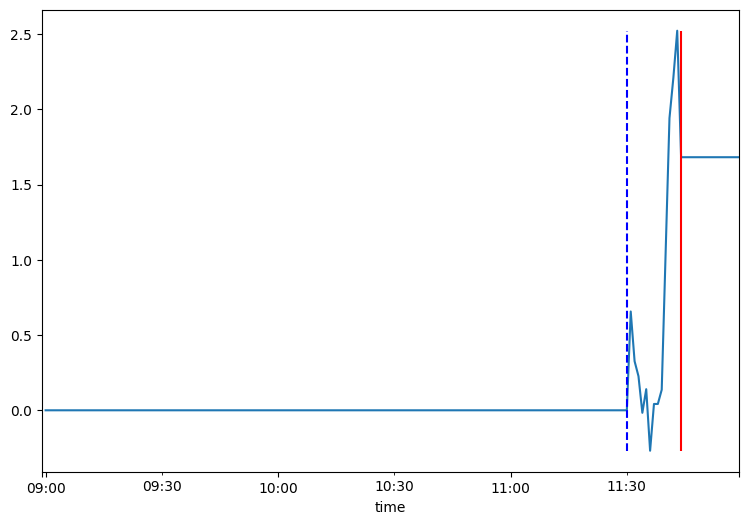

In [414]:
i = len(values_list) // 2
values_i = values_list[i]
ax = values_i.profit_raw.cumsum().plot(figsize=(9, 6))
ymin, ymax = values_i.profit_raw.cumsum().min(), values_i.profit_raw.cumsum().max()

ax.vlines(x=list(values_i[values_i.position_changed == +1].index), ymin=ymin, ymax=ymax, color='b', linestyles='dashed', label='enter')
ax.vlines(x=list(values_i[values_i.position_changed == -1].index), ymin=ymin, ymax=ymax, color='r', linestyles='solid', label='leave')

plt.show()

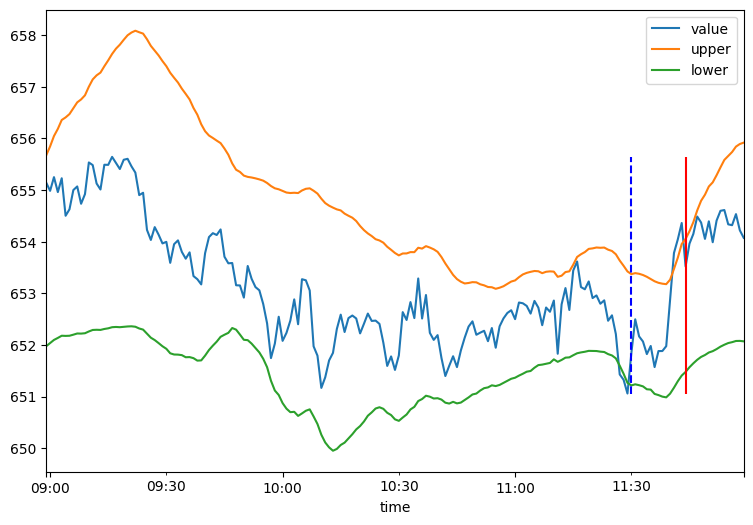

In [415]:
# plot dataframe; the index is a datetime index
#ax = values_rolling[['value', 'upper', 'lower']].plot(figsize=(9, 6))
ax = values_i[['value', 'upper', 'lower']].plot(figsize=(9, 6))
ymin, ymax = values_i.value.min(), values_i.value.max()

ax.vlines(x=list(values_i[values_i.position_changed == +1].index), ymin=ymin, ymax=ymax, color='b', linestyles='dashed', label='enter')
ax.vlines(x=list(values_i[values_i.position_changed == -1].index), ymin=ymin, ymax=ymax, color='r', linestyles='solid', label='leave')

plt.show()

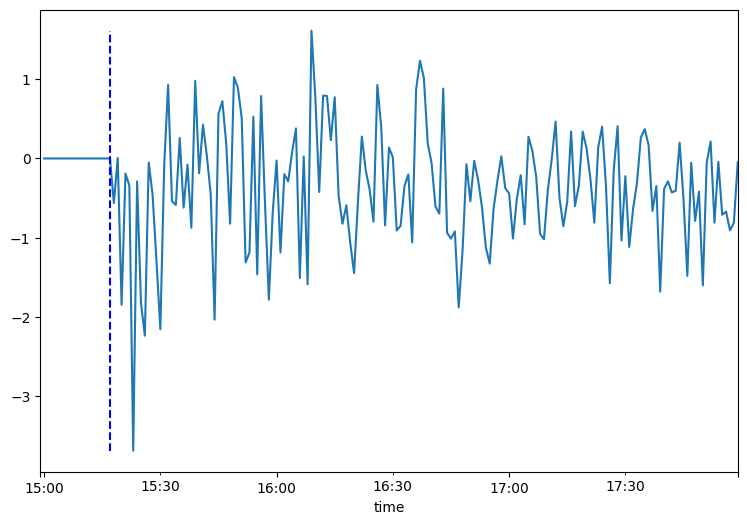

In [253]:
i = -2
values_i = values_list[i]
ax = values_i.profit_raw.cumsum().plot(figsize=(9, 6))
ymin, ymax = values_i.profit_raw.cumsum().min(), values_i.profit_raw.cumsum().max()

ax.vlines(x=list(values_i[values_i.position_changed == +1].index), ymin=ymin, ymax=ymax, color='b', linestyles='dashed', label='enter')
ax.vlines(x=list(values_i[values_i.position_changed == -1].index), ymin=ymin, ymax=ymax, color='r', linestyles='solid', label='leave')

plt.show()

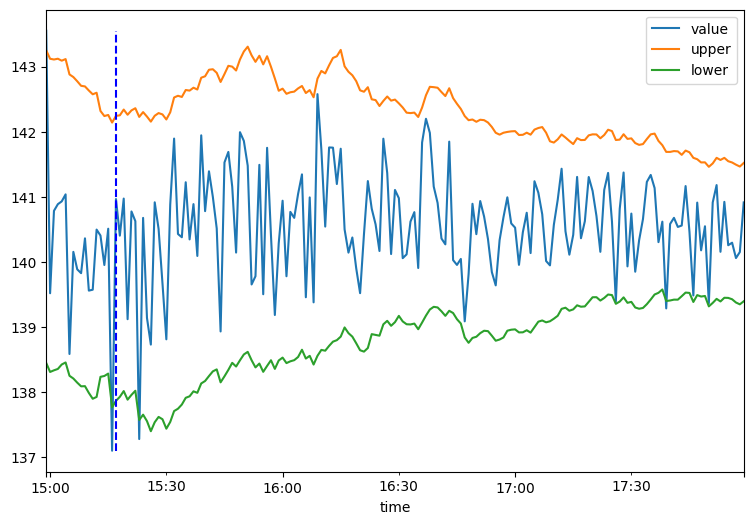

In [254]:
# plot dataframe; the index is a datetime index
#ax = values_rolling[['value', 'upper', 'lower']].plot(figsize=(9, 6))
ax = values_i[['value', 'upper', 'lower']].plot(figsize=(9, 6))
ymin, ymax = values_i.value.min(), values_i.value.max()

ax.vlines(x=list(values_i[values_i.position_changed == +1].index), ymin=ymin, ymax=ymax, color='b', linestyles='dashed', label='enter')
ax.vlines(x=list(values_i[values_i.position_changed == -1].index), ymin=ymin, ymax=ymax, color='r', linestyles='solid', label='leave')

plt.show()

<Axes: xlabel='time'>

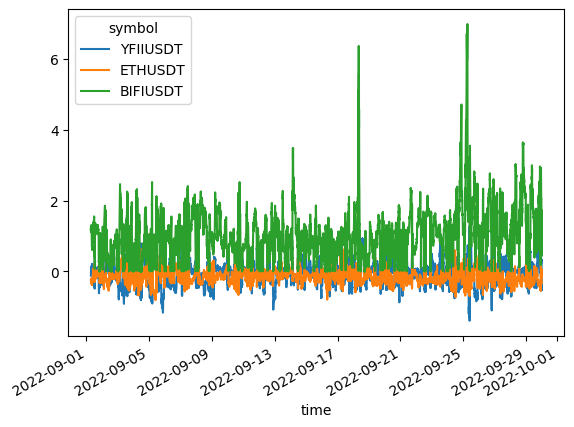

In [75]:
df_rolling_wgt.plot()

<Axes: xlabel='time'>

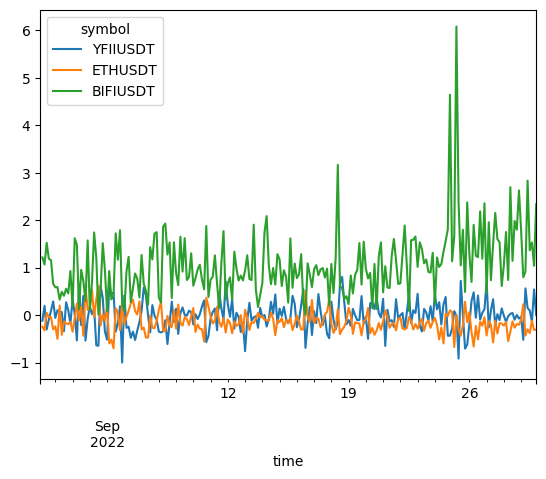

In [76]:
df_rolling_wgt_resampled.plot()